<a href="https://colab.research.google.com/github/mchhour31/NN_work/blob/main/ep1_basic_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
from tensorflow import keras

## Classification of MNIST Fashion Dataset

In [29]:
# import the data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



| Label | Class       |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle Boot  |

The images are 28x28 Numpy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9 representing the above classes.

In [103]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [30]:
train_images.shape # 60,000 images

(60000, 28, 28)

In [102]:
test_images.shape # 10,000 images

(10000, 28, 28)

## Visualisation of Training images

Text(0.5, 0, '9')

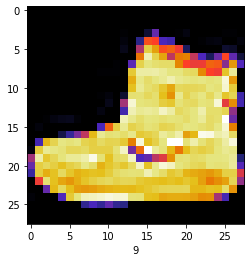

In [85]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='CMRmap')
plt.xlabel(train_labels[0])

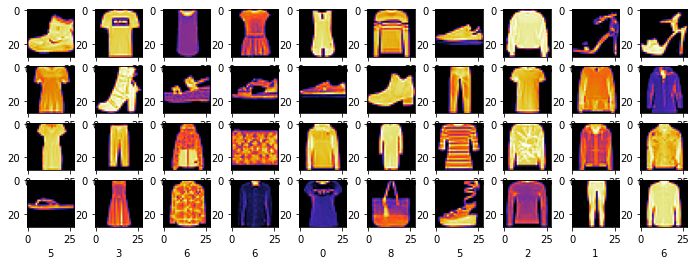

In [96]:
import matplotlib.pyplot as plt

f, axs = plt.subplots(4, 10, figsize=(12, 4))

for i, ax in enumerate(axs.flatten()):
  ax.imshow(train_images[i], cmap='CMRmap')

In [31]:
test_images.shape # 10,000 images for testing

(10000, 28, 28)

## Training the model

In [35]:
# define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # size of image (ie. 28x28 pixels)
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # output is any # from 0 to 10, and activation of softmax has the effect of picking the "largest # in a set"
])

model.compile(optimizer='adam', # optimizer generates new parameters for the functions 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # NN is optimised with random vals, and loss function evaluates how accurate these values are

In [36]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 3.7796 - accuracy: 0.7197
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6814 - accuracy: 0.7651
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5799 - accuracy: 0.7922
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5366 - accuracy: 0.8111
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5176 - accuracy: 0.8183


In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5573 - accuracy: 0.8179


In [41]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [107]:
import numpy as np

In [108]:
final = np.argmax(predictions[0]) # the model is most confident that the image is label=9, also known as the "ankle boot"

In [109]:
print(f"Prediction: {class_names[final]}")

Prediction: Ankle Boot


## Predicting the first 25 test images

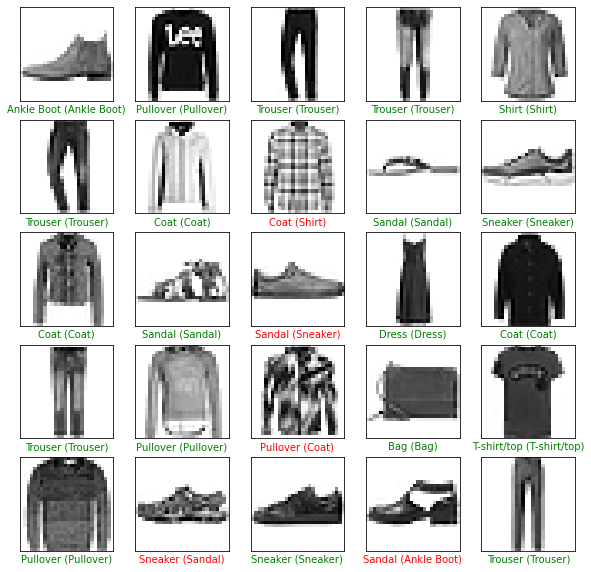

In [113]:
plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]

  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

In [114]:
print(f"Loss: {test_loss}") # seems very high could make smaller possibly 
print(f"Model Accuracy: {test_acc}")

Loss: 0.5573306679725647
Model Accuracy: 0.8179000020027161
